
fidelity: 1.0000000099871134


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pennylane/math/quantum.py:46: UserWarning: Argument passed to fidelity has shape (4, 4) and will be interpreted as a density matrix. If a batched state vector was intended, please call qml.math.dm_from_state_vector first, as passing state vectors to fidelity is deprecated.
  warnings.warn(


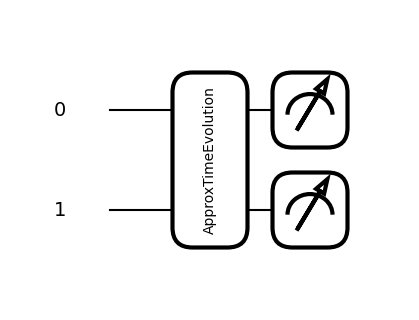

In [1]:
import matplotlib.pyplot as plt
import pennylane as qml
import scipy as sp

from pennylane import numpy as np
from IPython.display import display, Math

np.set_printoptions(threshold=np.inf, linewidth=np.inf)
np.set_printoptions()

dev = qml.device('default.qubit', wires= 2)


# == Pre_defined state ==
pauli_y = np.array([ [0, -1.j], [1.j, 0]])

# state = (00 + 01 + 10 + 11)/2
state_tot = np.kron( (np.array([[1], [0]]) + np.array([[0], [1]]))/np.sqrt(2) , (np.array([[1], [0]]) + np.array([[0], [1]]))/np.sqrt(2) )
rho_tot = state_tot @ state_tot.conj().T

# print('density_matrix of (|0> + |1>)/sqrt(2) cross (|0> + |1>)/sqrt(2): \n', rho_tot,'\n')


# Hamiltonian setup
coeffs = [1, 1]
obs = [qml.PauliY(0) , qml.PauliY(1)]

hamiltonian = qml.Hamiltonian(coeffs, obs)
# print('Hamiltonian:\n', hamiltonian,'\n')


# Quantum circuit
@qml.qnode(dev)
def circuit(theta_1, theta_2, tau):
	
	qml.ApproxTimeEvolution(hamiltonian, tau, 1)

	return qml.density_matrix(wires=[0, 1])


# theta_1 ,theta_2, tau
# print('circuit_density_matrix_init:\n',circuit(0,0,np.pi/4))

print('\nfidelity:', qml.math.fidelity(rho_tot, circuit(0,0,np.pi/4)))
fig, ax = qml.draw_mpl(circuit)(0,0,1)

In [2]:
def calculate_fidelity(tau):
    fidelity = qml.math.fidelity(rho_tot, circuit(0,0,tau))
    
    return 1-fidelity

# print(calculate_fidelity(np.pi/4))

Init_parameters = 0.8
result = sp.optimize.minimize(calculate_fidelity, Init_parameters, method='SLSQP')

print(result,'\n')

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.00042812365113853446
       x: [ 8.000e-01]
     nit: 2
     jac: [ 1.486e+00]
    nfev: 25
    njev: 2 



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pennylane/math/quantum.py:46: UserWarning: Argument passed to fidelity has shape (4, 4) and will be interpreted as a density matrix. If a batched state vector was intended, please call qml.math.dm_from_state_vector first, as passing state vectors to fidelity is deprecated.
  warnings.warn(


In [3]:
qml.math.fidelity(rho_tot, circuit(0,0, result.x[0]))

rho_real = circuit(0,0, result.x[0]).numpy().real
rho_imaginary = circuit(0,0, result.x[0]).numpy().imag

/var/folders/w1/ls_y8xbd21b7x0tbqwgfdcd00000gn/T/ipykernel_16526/3175280951.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(state)
/var/folders/w1/ls_y8xbd21b7x0tbqwgfdcd00000gn/T/ipykernel_16526/3175280951.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(state_y)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


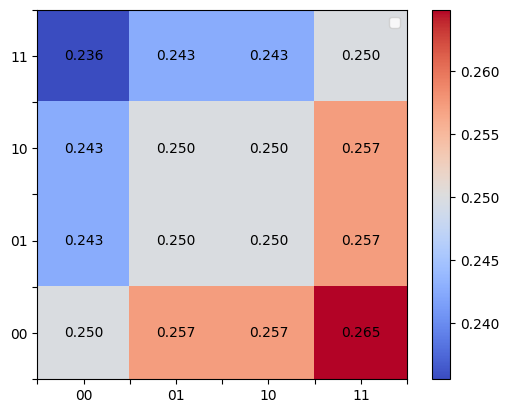

In [4]:
# Real parts

# fig, ax = plt.subplots()
state = ["",'00',"",'01',"",'10',"",'11']
state_y = ["",'11',"",'10',"",'01',"",'00']

fig, ax = plt.subplots()
plt.imshow(rho_real, cmap="coolwarm")
plt.colorbar()
ax.set_xticklabels(state)
ax.set_yticklabels(state_y)


for (j,i),label in np.ndenumerate(rho_real):
    ax.text(i,j, "{:.3f}".format(label),ha="center", va="center")
ax.legend()
plt.show()

/var/folders/w1/ls_y8xbd21b7x0tbqwgfdcd00000gn/T/ipykernel_16526/858889623.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(state)
/var/folders/w1/ls_y8xbd21b7x0tbqwgfdcd00000gn/T/ipykernel_16526/858889623.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(state_y)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


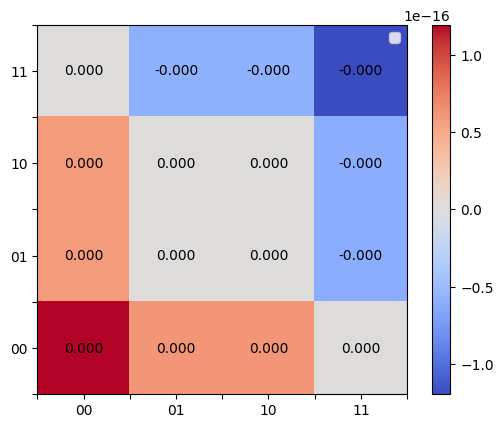

In [5]:
# Im parts

# fig, ax = plt.subplots()
state = ["",'00',"",'01',"",'10',"",'11']
fig, ax = plt.subplots()
plt.imshow(rho_imaginary, cmap="coolwarm")
plt.colorbar()
ax.set_xticklabels(state)
ax.set_yticklabels(state_y)


for (j,i),label in np.ndenumerate(rho_imaginary):
    ax.text(i,j, "{:.3f}".format(label),ha="center", va="center")
ax.legend()
plt.show()